In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_curve,auc
#from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [6]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [7]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [10]:
#0 : Employee does not quit
#1: Employee quits the organization
data.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [11]:
X = data.drop(["Attrition"],axis=1)
y = data["Attrition"]

In [12]:
#Encoding
X_dummies = pd.get_dummies(X)
X_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_dummies,y,
                               test_size=0.3, stratify=y)

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=80)   
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

In [18]:
pd.Series(clf.feature_importances_ ,index = X_dummies.columns).sort_values(ascending=False).head(10)

MonthlyIncome                        0.327766
OverTime_Yes                         0.200474
OverTime_No                          0.120259
StockOptionLevel                     0.119570
TotalWorkingYears                    0.102496
EnvironmentSatisfaction              0.074677
DailyRate                            0.054758
JobRole_Healthcare Representative    0.000000
EducationField_Human Resources       0.000000
EducationField_Life Sciences         0.000000
dtype: float64

In [19]:
y_pred = clf.predict(X_test)

In [20]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[360  10]
 [ 56  15]]


In [21]:
print("accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

accuracy(in %): 85.03401360544217


In [22]:
metrics.f1_score(y_test,y_pred)

0.3125

## ROC Curve

In [23]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [24]:
#Compute the area under the curve between fpr and tpr
roc_auc,fpr,tpr = compute_auc(X_test,clf)
roc_auc

0.7016939474685954

In [25]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

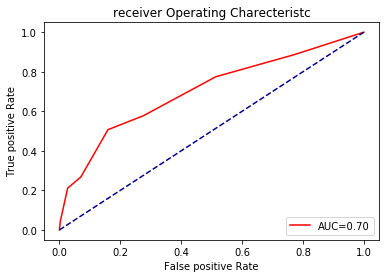

In [26]:
plot_ROC(roc_auc,fpr,tpr)

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

In [28]:
cols = X_dummies.columns

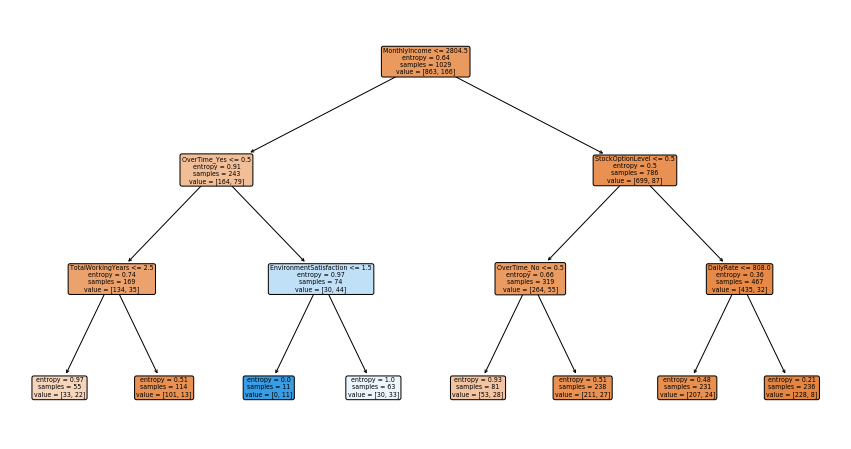

In [29]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=cols, filled=True,precision=2,
              rounded=True)
plt.show()